<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Quantum Computing and Quantum Machine Learning, Project 1 -->

## Part c)

Implement now the variational quantum eigensolver (VQE) for the above
Hamiltonian and set up the circuit(s) which is(are) needed in order to find
the eigenvalues of this system. Discuss the results and compare these
with those from part b). Feel free to use either **Qiskit** or your own
code (based on the setup from part a)) or both approaches. Discuss
your results.

<span style="color:red">Solution:</span>

The variational quantum eigensolver (VQE) is a hybrid algorithm that variationally calculate the ground state energy of a hamiltonian. Hybrid because use classical optimization techniques. \
We can use Qiskit for plot the quantum circuit with the gates. For this case we need to select some ansatz (Parameterized Quantum Circuit), which get information global and give us a good expectation value of the hamiltonian.
The idea is to go through all the points of the Bloch sphere, optimizate values and minimize the expectation value. 

For this case a good ansatz must include rotationals gates: 

$$|\Psi \rangle = R_{y}(\phi)R_{x}(\theta)|0\rangle $$

To work with VQE, we must to modify the Hamiltonian. Modify or rewrite via Pauli matrices and identity matrix.

Remind the expressions for the rotational gates

$$R_{y}(\phi) = \cos(\frac{\phi}{2})I - i\sin(\frac{\phi}{2})\sigma_{y} =
\begin{bmatrix}
\cos(\frac{\phi}{2}) & -\sin(\frac{\phi}{2}) \\
\sin(\frac{\phi}{2}) & \cos(\frac{\phi}{2}) 
\end{bmatrix}$$

$$R_{x}(\theta) =  \cos(\frac{\theta}{2})I - i\sin(\frac{\theta}{2})\sigma_{x} =
\begin{bmatrix}
\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\
-i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) 
\end{bmatrix}$$

Energy, using the ansatz

$$E = \langle \Psi |H|\Psi \rangle = \langle 0|R_{x}(\theta) R_{y}(\phi) H R_{y}(\phi)R_{x}(\theta)|0\rangle$$

Quantum Circuit:


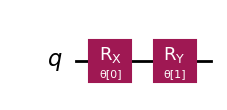

Energy: 0.980196098885479
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Optimal parameters θ[0,1]: [4.82453751e-05 3.33901682e+00]


In [1]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler, Estimator 

ansatz = TwoLocal(1, ['rx','ry'], 'cx','linear', reps=0)       # ansatz
op = SparsePauliOp.from_list([('Z',1), ('I',2), ('X',0.2)])    # Hamiltonian in Pauli matrices  

estimator = Estimator() 
optimizer = COBYLA() 
 
vqe = VQE(estimator, ansatz, optimizer) 
result = vqe.compute_minimum_eigenvalue(operator=op) 
eigenvalue = result.eigenvalue

print("Quantum Circuit:")
display(ansatz.decompose().draw('mpl'))
print("Energy:",eigenvalue)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Optimal parameters θ[0,1]:",result.optimal_point)

Now We can set up the circuit to perform measurements using the optimal parameters $\theta [0]$ and $\theta [1]$

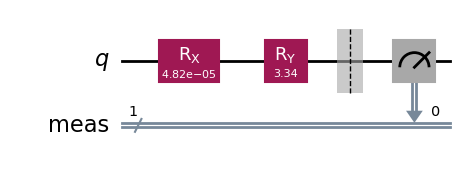

In [2]:
from qiskit import QuantumCircuit
import qiskit_aer
from qiskit.visualization import plot_histogram
import numpy as np

backend = qiskit_aer.Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(1)
qc.rx(result.optimal_point[0],0)      # Rx gate
qc.ry(result.optimal_point[1],0)      # Ry gate
    
qc.measure_all()
qc.draw(output="mpl")

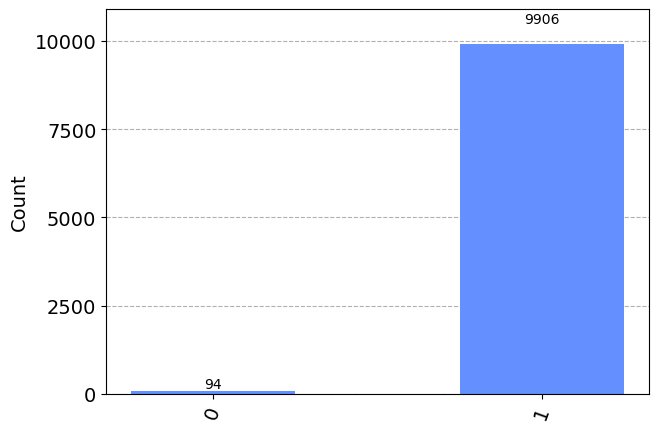

In [3]:
job = backend.run(qc, shots=10000)
result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)

<span style="color:red">Comment:</span> This method provides exact information about the ground state energy. If we compare with the **question b)**, the value for the energy is similar when $\lambda = 1$, only if we compare the real part. Besides the imaginary part can be neglected, because is very small. It is also possible get information about the angles.

We also have created other code using qiskit but define the wave function (ansatz) and the explicit calculation for the expectation value. You can check the created code in **[https://github.com/JosephPVera/UIO/blob/main/Quantum%20Computing/Project%201/Report%20codes/%20Project%201%20-%20Report%20codes.ipynb](https://github.com/JosephPVera/UIO/blob/main/Quantum%20Computing/Project%201/Report%20codes/%20Project%201%20-%20Report%20codes.ipynb)**